#Machine Learning and FinTech 2024/25
##Homework 1104 reference answer
By TA, Chan Nok Hang

| Name  | HW CODE  | Question                                            |
|-------|----------|-----------------------------------------------------|
| Scottie  | HW1104Q1  | Ch05_Q01 on p224 (math)                         |
| Alice    | HW1104Q2  | Ch05_Q08 on p227                                |
| Kevin    | HW1104Q3  | Ch05_Q09 on p227                                |

# Ch5_Q1
1.Using basic statistical properties of the variance, as well as single variable calculus, derive(5.6). In other words,prove that $α$ given by (5.6) does indeed minimize $Var(αX+(1-α)Y)$.
$$ α=\frac{σ_Y^2-σ_{XY}}{σ_X^2+σ_Y^2-2σ_{XY}} \tag{5.6}$$

To prove that $\alpha$ given by Equation (5.6) minimizes $\operatorname{Var}(\alpha X + (1 - \alpha) Y) $, we can go through the following steps:

1. **Set up the variance of the linear combination**:
   $$Z = \alpha X + (1 - \alpha) Y.$$
   We want to find $\alpha$ that minimizes $\operatorname{Var}(Z)$.

2. **Compute $\operatorname{Var}(Z)$**:
   Using the properties of variance, we can expand $\operatorname{Var}(Z)$ as follows:
   $$
   \operatorname{Var}(Z) = \operatorname{Var}(\alpha X + (1 - \alpha) Y).
   $$
   Since $\operatorname{Var}(aX + bY) = a^2 \operatorname{Var}(X) + b^2 \operatorname{Var}(Y) + 2ab \operatorname{Cov}(X, Y)$, we have
   $$
   \operatorname{Var}(Z) = \alpha^2 \sigma_X^2 + (1 - \alpha)^2 \sigma_Y^2 + 2 \alpha (1 - \alpha) \sigma_{XY},
   $$
   where $\sigma_X^2 = \operatorname{Var}(X)$, $\sigma_Y^2 = \operatorname{Var}(Y)$, and $\sigma_{XY} = \operatorname{Cov}(X, Y)$.

3. **Expand the expression**:
   Expanding $(1 - \alpha)^2 \sigma_Y^2$ and $2 \alpha (1 - \alpha) \sigma_{XY} $, we get:
   $$
   \operatorname{Var}(Z) = \alpha^2 \sigma_X^2 + (1 - 2\alpha + \alpha^2) \sigma_Y^2 + 2 \alpha (1 - \alpha) \sigma_{XY}.
   $$
   Simplifying this expression gives:
   $$
   \operatorname{Var}(Z) = \alpha^2 \sigma_X^2 + \sigma_Y^2 - 2 \alpha \sigma_Y^2 + \alpha^2 \sigma_Y^2 + 2 \alpha \sigma_{XY} - 2 \alpha^2 \sigma_{XY}.
   $$
   Collecting terms involving $\alpha^2$, $\alpha$, and constants:
   $$
   \operatorname{Var}(Z) = \alpha^2 (\sigma_X^2 + \sigma_Y^2 - 2 \sigma_{XY}) + \alpha (-2 \sigma_Y^2 + 2 \sigma_{XY}) + \sigma_Y^2.
   $$

4. **Differentiate with respect to $\alpha$**:
   To minimize $\operatorname{Var}(Z)$, take the derivative with respect to $\alpha$ and set it to zero:
   $$
   \frac{d}{d\alpha} \operatorname{Var}(Z) = 2 \alpha (\sigma_X^2 + \sigma_Y^2 - 2 \sigma_{XY}) + (-2 \sigma_Y^2 + 2 \sigma_{XY}) = 0.
   $$
   Solving for $\alpha$, we get:
   $$
   \alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2 \sigma_{XY}}.
   $$
   This is precisely Equation (5.6), as required.

5. **Confirm that this is a minimum**:
   To verify that this value of $\alpha$ minimizes $\operatorname{Var}(Z)$, we can examine the second derivative:
   $$
   \frac{d^2}{d\alpha^2} \operatorname{Var}(Z) = 2 (\sigma_X^2 + \sigma_Y^2 - 2 \sigma_{XY}),
   $$
   which is positive if $\sigma_X^2 + \sigma_Y^2 - 2 \sigma_{XY} > 0$. Therefore, the solution for $\alpha$ is indeed a minimum, completing the proof.
  

#Ch5_Q8
8.We will now perform cross-validation on a simulated data set.

##(a)
Generate a simulated data set as follows:
```
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x- 2 * x**2 + rng.normal(size=100)
```

In this data set, what is $n$ and what is $p$? Write out the model used to generate the data in equation form.


In [ ]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

n = 100, p = 1<br>
The model used to generate the data can be written as: $ Y = X − 2X^2 + 𝜖 $, where
$𝜖$ is a random noise that following normal distribution.

##(b)
Create a scatterplot of X against Y . Comment on what you find.

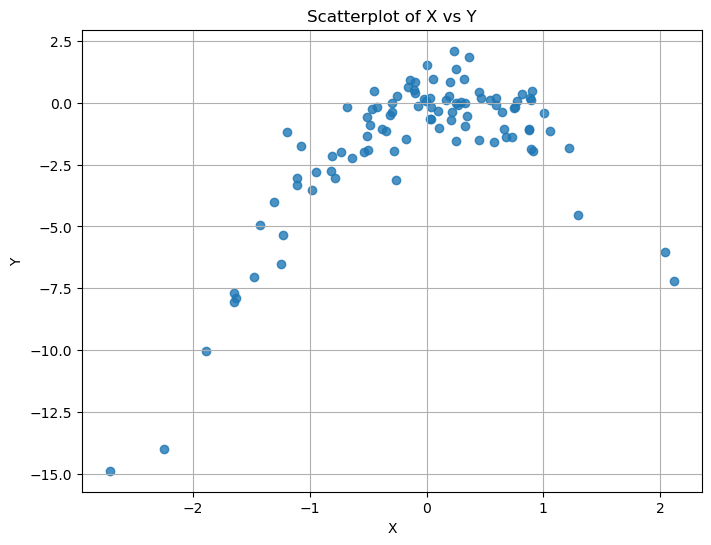

In [ ]:
# Scatter plot of X against Y
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X vs Y")
plt.grid(True)
plt.show()

The scatterplot seems like a *parabolic trend* due to the quadratic term $-2X$ in the model. <br>

**Symmetry Around the Origin:** Since $y=x−2x^2+𝜖$ and without the noise $𝜖$, $y$ would be symmetric around the origin. We might see data points scattered around this parabolic curve due to the added noise, giving a somewhat "fuzzy" appearance around the curve.<br>

**Spread Due to Noise:** The noise term $𝜖$ adds variability, so individual points will deviate from the smooth curve, creating a spread in the data. This scatter indicates the randomness and noise inherent in real-world data.



##(c)
Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:
  
i. $Y = \beta_0 + \beta_1X + \epsilon$

ii. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon$

iii. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

iv. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 + \epsilon$  
  
Note you may find it helpful to use the `data.frame()` function to create a single data set containing both X and Y .

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(1)

# Create a DataFrame containing both X and Y
data = pd.DataFrame({'X': x, 'Y': y})

# Define a function to compute LOOCV error for a given polynomial degree
def loocv_error(degree):
    # Prepare features with polynomial terms up to the specified degree
    X_poly = np.vander(data['X'], degree + 1, increasing=True)  # increasing=True gives [X^0, X^1, ..., X^degree]
    loo = LeaveOneOut()
    errors = []

    # Perform LOOCV
    for train_index, test_index in loo.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = data['Y'].values[train_index], data['Y'].values[test_index]

        # Fit the model using least squares
        model = LinearRegression().fit(X_train, y_train)

        # Predict and calculate the error for this test point
        y_pred = model.predict(X_test)
        errors.append((y_test - y_pred) ** 2)

    # Return the average LOOCV error
    return np.mean(errors)

# Compute LOOCV errors for each model (degree 1 to 4)
degrees = [1, 2, 3, 4]
loocv_errors = {f'Degree {d}': loocv_error(d) for d in degrees}


# Display the LOOCV errors for each model
loocv_errors

{'Degree 1': 6.633029839181981,
 'Degree 2': 1.1229368563419688,
 'Degree 3': 1.3017965489358838,
 'Degree 4': 1.332394269417932}

##(d)
Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [ ]:
# Repeat Part (c) with a new random seed
np.random.seed(42)  # Set a different random seed

# Re-compute LOOCV errors for each model (degree 1 to 4) using the new seed
new_loocv_errors = {f'Degree {d}': loocv_error(d) for d in degrees}

# Display the LOOCV errors with the new seed for comparison
new_loocv_errors

{'Degree 1': 6.633029839181981,
 'Degree 2': 1.1229368563419688,
 'Degree 3': 1.3017965489358838,
 'Degree 4': 1.332394269417932}

### Answer:
- **Yes, the results are the same as in (c).**
  
- **Why?**
  - We only changed the random seed without regenerating the data, so the dataset remained unchanged.
  - LOOCV errors are based on the specific data; if the data stays the same, the results will also stay the same.
  
- **To see different results**, we would need to regenerate the data after changing the seed.

##(e)
Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

### Answer:
- The model with **Degree 2** (quadratic model) had the smallest LOOCV error of **1.1229**.

### Is this expected?
Yes, this result aligns with our expectations. The data generation model was defined as  $y = x-2x^2+\epsilon$ , which is a quadratic relationship. Therefore, a quadratic model should provide the best fit, as it directly matches the underlying structure of the data. Higher-degree models (Degrees 3 and 4) introduce unnecessary complexity, which may slightly increase the error due to overfitting, while the linear model (Degree 1) is too simple to capture the curvature in the data.

##(f)
Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [ ]:
import statsmodels.api as sm
# Define a function to retrieve p-values for a given polynomial degree
def get_pvalues(data, degree):
    # Add polynomial terms to the data up to the specified degree
    X_poly = np.vander(data['X'], degree + 1, increasing=True)
    X_poly = sm.add_constant(X_poly)  # Add intercept term
    y = data['Y']

    # Fit the model using statsmodels OLS
    model = sm.OLS(y, X_poly).fit()

    # Retrieve p-values for coefficients
    return model.pvalues

pvalues_dict = {f'Degree {d}': get_pvalues(data, d) for d in degrees}
print("P-values for each model:\n")
for degree, pvalues in pvalues_dict.items():
    print(f"{degree} Model:")
    for term, pvalue in pvalues.items():
        print(f"  {term}: {pvalue:.5e}")  # Display p-value in scientific notation with 5 decimal places
    print("\n")

P-values for each model:

Degree 1 Model:
  const: 4.40962e-08
  x1: 1.03651e-09


Degree 2 Model:
  const: 5.42824e-01
  x1: 1.49491e-11
  x2: 1.34007e-39


Degree 3 Model:
  const: 6.34502e-01
  x1: 4.44852e-08
  x2: 3.96891e-37
  x3: 2.87202e-01


Degree 4 Model:
  const: 4.59605e-01
  x1: 2.59130e-05
  x2: 2.39603e-19
  x3: 6.42491e-01
  x4: 2.31066e-02




### Answer:
Yes, the p-values confirm the cross-validation results:

1. **Degree 1 Model**: Both terms are significant, but the model is too simple, leading to a higher LOOCV error.

2. **Degree 2 Model**: \( X \) and \( $X^2$ \) are highly significant, matching the lowest LOOCV error and best fit for the data’s quadratic relationship.

3. **Degree 3 Model**: \( $X^3$ \) is not significant, indicating overfitting, which aligns with the slightly higher LOOCV error.

4. **Degree 4 Model**: \( $X^3$ \) and \( $X^4$ \) are mostly insignificant, supporting that added terms don’t improve fit and may overfit.

In summary, both p-values and LOOCV agree: the Degree 2 model is optimal.

#Ch_Q9
9.We will now consider the Boston housing data set, from the ISLP library.

##(a)
Based on this data set, provide an estimate for the population mean of medv. Call this estimate $\hat\mu$.


In [ ]:
from ISLP import load_data
import pandas as pd
import numpy as np

#Download the data
boston_data = load_data('Boston')
medv = boston_data['medv']

mean_medv = np.mean(medv)
print("Estimate of the population mean (μ̂):", mean_medv)

Estimate of the population mean (μ̂): 22.532806324110677


##(b)
Provide an estimate of the standard error of $\hat\mu$. Interpret this result.

In [ ]:
std_error_mean = np.std(medv, ddof=1) / np.sqrt(len(medv))
print("Standard error of the mean (SE(μ̂ )):", std_error_mean)

Standard error of the mean (SE(μ̂)): 0.40886114749753505


The standard error of the sample mean is 0.408. Specifically, this means that the sample mean, as an estimate of the population mean, will vary due to random sampling, and the range of variation is about 0.408.

## (c)
Now estimate the standard error of $\hat\mu$ using the bootstrap. How does this compare to your answer from (b)?

In [ ]:
from sklearn.utils import resample

bootstrap_means = [np.mean(resample(medv)) for _ in range(1000)]
bootstrap_std_error_mean = np.std(bootstrap_means)
print("Bootstrap estimate of the standard error of the mean:", bootstrap_std_error_mean)

Bootstrap estimate of the standard error of the mean: 0.404131170683672


This result strengthens our confidence in the standard error of the sample mean because both have produced similar standard errors. This shows that our sample mean estimate is stable and the calculated standard error is reliable.

##(d)
Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of medv. Compare it to the results obtained by using Boston['medv'].std() and the two standard error rule (3.9).

In [ ]:
#C.I. of (c)
ci_lower_1 = mean_medv - 2 * bootstrap_std_error_mean
ci_upper_1 = mean_medv + 2 * bootstrap_std_error_mean
print("95% confidence interval for the mean_1:", (ci_lower_1, ci_upper_1))

#C.I. of (b)
ci_lower_2 = mean_medv - 2 * std_error_mean
ci_upper_2 = mean_medv + 2 * std_error_mean
print("95% confidence interval for the mean_2:", (ci_lower_2, ci_upper_2))


95% confidence interval for the mean_1: (21.724543982743334, 23.34106866547802)
95% confidence interval for the mean_2: (21.715084029115605, 23.35052861910575)


Both coincidence interval are exactly same.They are give us more reliable estimate of std error for mean.

##(e)
Based on this data set, provide an estimate, $\hat\mu_{med}$, for the median value of medv in the population.

In [ ]:
median_medv = np.median(medv)
print("Estimate of the population median (μ̂_med):", median_medv)

Estimate of the population median (μ̂_med): 21.2


##(f)
We now would like to estimate the standard error of $\hat\mu_{med}$. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

In [ ]:
bootstrap_medians = [np.median(resample(medv)) for _ in range(1000)]
bootstrap_std_error_median = np.std(bootstrap_medians)
print("Bootstrap estimate of the standard error of the median:", bootstrap_std_error_median)

Bootstrap estimate of the standard error of the median: 0.3776990733374915


The standard error median is very small.It means that median is a stable estimate of population median.

### NOTE:why no simple formula for computing std error of median?

1.The distribution of the median is more complex

2.The median has little impact on outliers, and the variability of the median depends mainly on the location of the value in the data set, rather than the characteristics of the overall distribution

##(g)
Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts. Call this quantity $\hat\mu_{0.1}$.(You can use the np.percentile() function.)

In [ ]:
percentile_10 = np.percentile(medv, 10)
print("Estimate of the 10th percentile (μ̂_0.1):", percentile_10)

Estimate of the 10th percentile (μ̂_0.1): 12.75


## (h)
Use the bootstrap to estimate the standard error of $\hat\mu_{0.1}$. Comment on your findings.

In [ ]:
bootstrap_percentiles_10 = [np.percentile(resample(medv), 10) for _ in range(1000)]
bootstrap_std_error_percentile_10 = np.std(bootstrap_percentiles_10)
print("Bootstrap estimate of the standard error of the 10th percentile:", bootstrap_std_error_percentile_10)

Bootstrap estimate of the standard error of the 10th percentile: 0.48855386345826796


It means that there has small alteration on 10th percentile data,the range of variation is 0.48,but it still a stable estimate of 10th percentile data of population.